##  Data Preparation

The dataset used in this project (*sme_credit_data_messy.csv*) required several cleaning and preprocessing steps before analysis. Below is a summary of the transformations applied:

1. **Loaded the dataset** using *pandas* for data manipulation.
2. **Cleaned the *loan_amount* column**:
   - Removed dollar signs (*$*) and commas (*,*) from the values.
   - Converted the column to numeric (*float*) for analysis.
3. **Processed the *company_type* column**:
   - Removed invalid entries and stray characters (*;*).
   - Standardized text by capitalizing values.
   - Filled missing values with *'Unknown'.
4. **Handled missing values**:
   - Dropped rows missing critical fields: *company_name*, *annual_revenue*, and *operating_margin*.
   - Filled missing *loan_amount* values with the column median.
   - Replaced missing *comments* with *'no comment'*.
5. **Converted the last_updated column** to proper *datetime* format.
6. **Checked for remaining null values** to ensure data quality.
7. **Explored the *default_status* column** to understand class distribution.

These steps ensured that the dataset was clean, consistent, and ready for analysis and modeling.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sme_credit_data_messy.csv')

# Display the first few rows
df.head()

# Clean 'loan_amount' column: remove currency symbols and commas, then convert to float
df['loan_amount'] = df['loan_amount'].str.replace('$', '', regex=False)
df['loan_amount'] = df['loan_amount'].str.replace(',', '', regex=False)
df['loan_amount'] = df['loan_amount'].astype(float)

# Remove rows with invalid company type value
df = df[df['company_type'] != ';']

# Clean and format 'company_type' column
df['company_type'] = df['company_type'].str.replace(';', '', regex=False)
df['company_type'] = df['company_type'].str.capitalize()
df['company_type'] = df['company_type'].fillna('Unknown')

# Drop rows with missing critical data
df = df.dropna(subset=['company_name', 'annual_revenue', 'operating_margin'])

# Fill missing values in 'loan_amount' with the median
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].median())

# Fill missing comments with 'nocomment'
df['comments'] = df['comments'].fillna('no comment')

# Convert 'last_updated' column to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'], format='mixed')

# check the data to see if everything is ok !
print(df.head())

# Check for any remaining missing values
print(df.isnull().sum())

# View distribution of target variable( default_status)
print(df['default_status'].value_counts())

# View distribution of company type
print(df['company_type'].value_counts())


      loan_id     company_name  company_age    company_type  annual_revenue  \
0  L-fd0da17b  OmniSystems-350            6    Construction       3713570.0   
1  L-ffc5a99d  OmniSystems-928            4          Retail       3085352.0   
2  L-fe1cdbf0       Summit-180            1  Transportation       1597899.0   
3  L-eda64cc1   BrightStar-463            2      Healthcare       1158434.0   
4  L-81078f6c  OMNISYSTEMS-167            3      Healthcare       3484318.0   

   debt_to_equity  operating_margin  credit_score  existing_loans  \
0        1.389389          0.129598           626              -1   
1        1.124420          0.162422           704               0   
2        2.260296          0.133556           607               0   
3        1.064494          0.104270           661               1   
4        1.266645          0.082046           648               0   

   loan_amount  loan_term  default_status last_updated           comments  
0     100000.0         12         

## Exploratory Data Analysis (EDA)

The goal of this EDA is to understand the structure, relationships, and distributions of key variables in the cleaned dataset.

### Dataset Overview
- Focused on 10 key columns, including *company_age*, *annual_revenue*, *debt_to_equity*, *operating_margin*, *credit_score*, *loan_amount*, and *default_status*.
- Set *last_updated* as the index to allow time-based analysis.
- Rounded selected columns (*operating_margin*, *debt_to_equity*) for cleaner presentation.
- Displayed descriptive statistics for all numeric features.

### Correlation Analysis
- Generated a **correlation heatmap** to explore relationships between variables.
- Notable correlations:
  - *loan_amount* is positively correlated with *annual_revenue*.
  - *credit_score* is negatively correlated with *default_status* (as expected).

### Distribution and Outlier Detection
- Plotted **histograms** for:
  - *debt_to_equity*
  - *credit_score*
  - Other numeric features (e.g., *loan_amount*, *loan_term*, *company_age*)
- Used **boxplots** to identify potential outliers in key variables.
- Visualized **target distribution** (`default_status`) using a countplot.

### Time-Based Analysis
- Analyzed **monthly trends in default rates** using a resampled line plot.
- Useful for observing seasonality or shifts in lending performance over time.

c/c: These insights helped identify key patterns in financial health, risk exposure, and borrower behavior, setting the stage for predictive modeling.



 Dataset Sample:


,company_age,annual_revenue,debt_to_equity,operating_margin,credit_score,existing_loans,loan_amount,loan_term,default_status
last_updated,,,,,,,,,
2024-05-30,6,3713570.0,1.389,0.130,626,-1,100000.0,12,0
2025-05-02,4,3085352.0,1.124,0.162,704,0,220000.0,36,0
2024-11-11,1,1597899.0,2.260,0.134,607,0,480000.0,12,0
2025-04-26,2,1158434.0,1.064,0.104,661,1,110000.0,60,0
2024-07-29,3,3484318.0,1.267,0.082,648,0,910000.0,24,0



 Summary Statistics:


,company_age,annual_revenue,debt_to_equity,operating_margin,credit_score,existing_loans,loan_amount,loan_term,default_status
count,8914.00000,8.914000e+03,8914.000000,8914.000000,8914.000000,8914.000000,8914.000000,8914.000000,8914.000000
mean,4.41317,2.596226e+06,602.656869,0.101154,625.390621,0.924725,515458.828809,46.812318,0.134283
std,2.90763,1.385508e+06,2376.815482,0.086135,154.387746,1.052983,272076.996041,102.312201,0.390373
min,-1.00000,2.004840e+05,0.100000,-0.050000,0.000000,-1.000000,50000.000000,12.000000,-1.000000
25%,2.00000,1.382626e+06,0.996000,0.027250,572.000000,0.000000,280000.000000,24.000000,0.000000
50%,4.00000,2.619027e+06,1.558500,0.101000,646.000000,1.000000,510000.000000,36.000000,0.000000
75%,6.00000,3.792522e+06,2.163000,0.176000,714.750000,2.000000,750000.000000,48.000000,0.000000
max,18.00000,4.998844e+06,9999.000000,0.250000,850.000000,6.000000,990000.000000,999.000000,1.000000


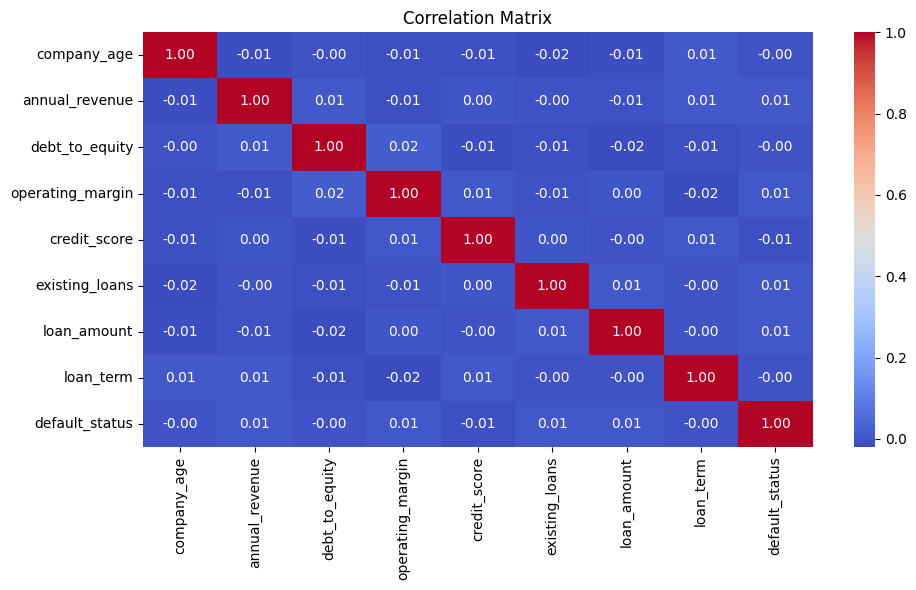

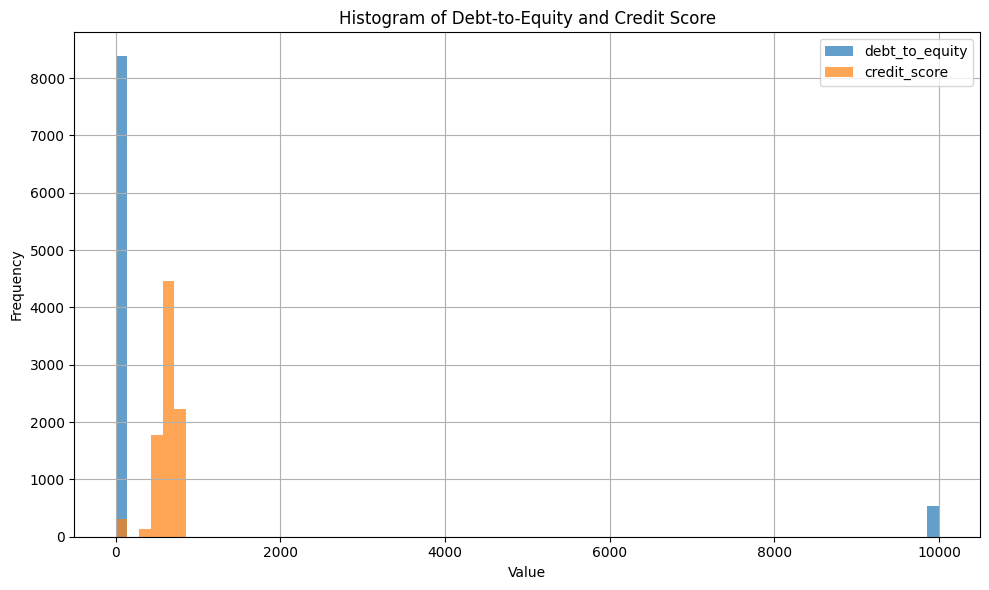

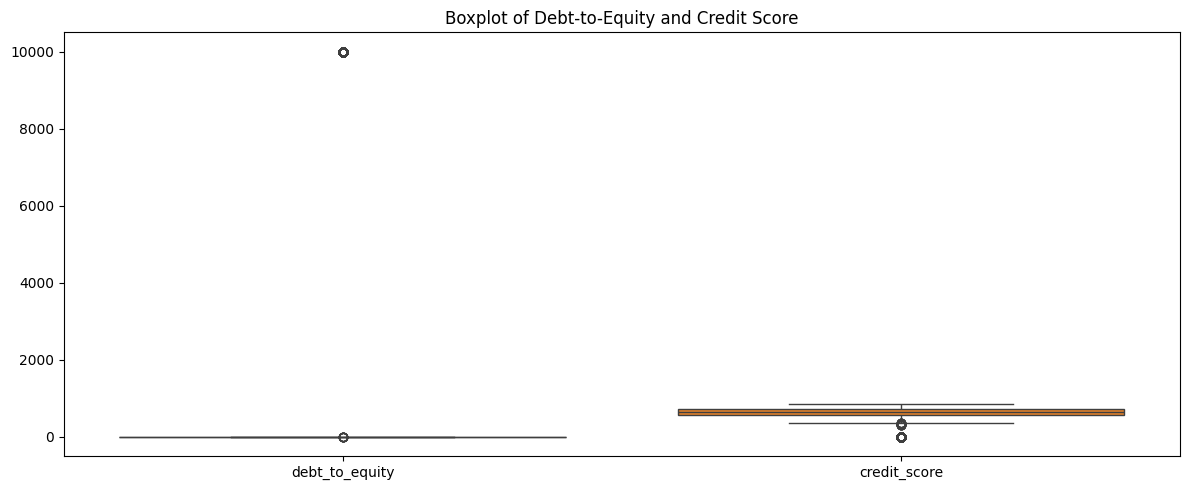

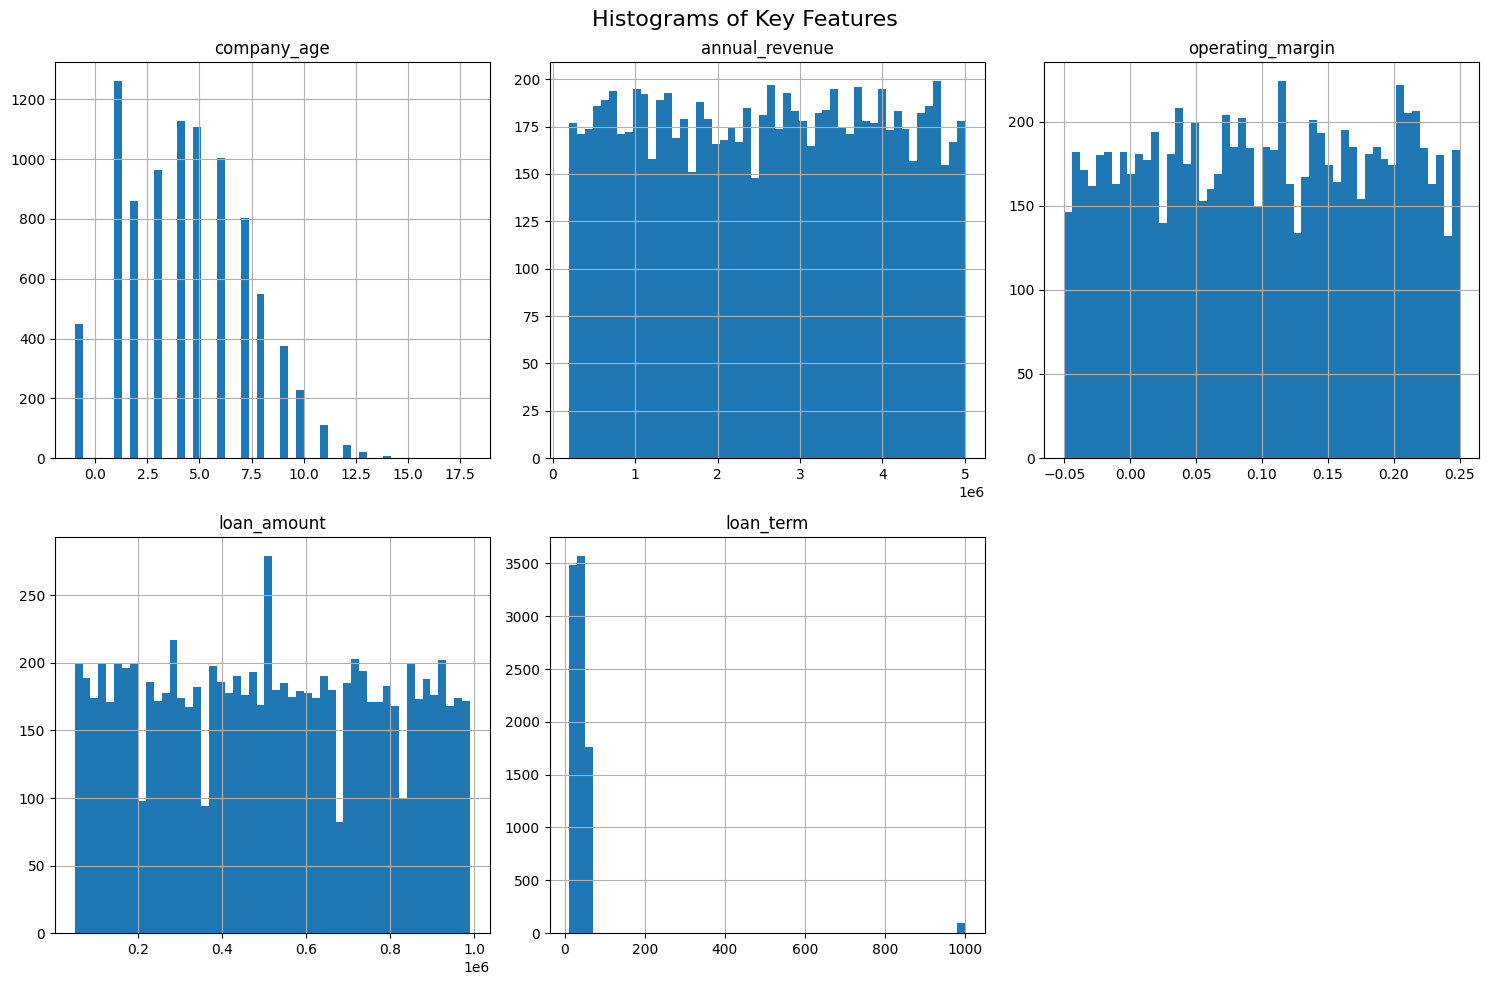

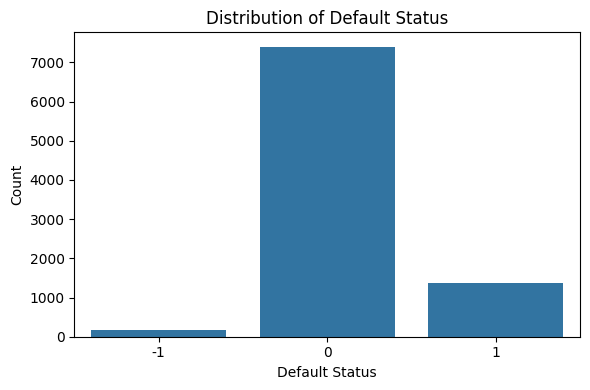

C:\Users\Ange Morel\AppData\Local\Temp\ipykernel_10660\404513635.py:71: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_defaults = n_df.resample('M')['default_status'].value_counts().unstack().fillna(0)


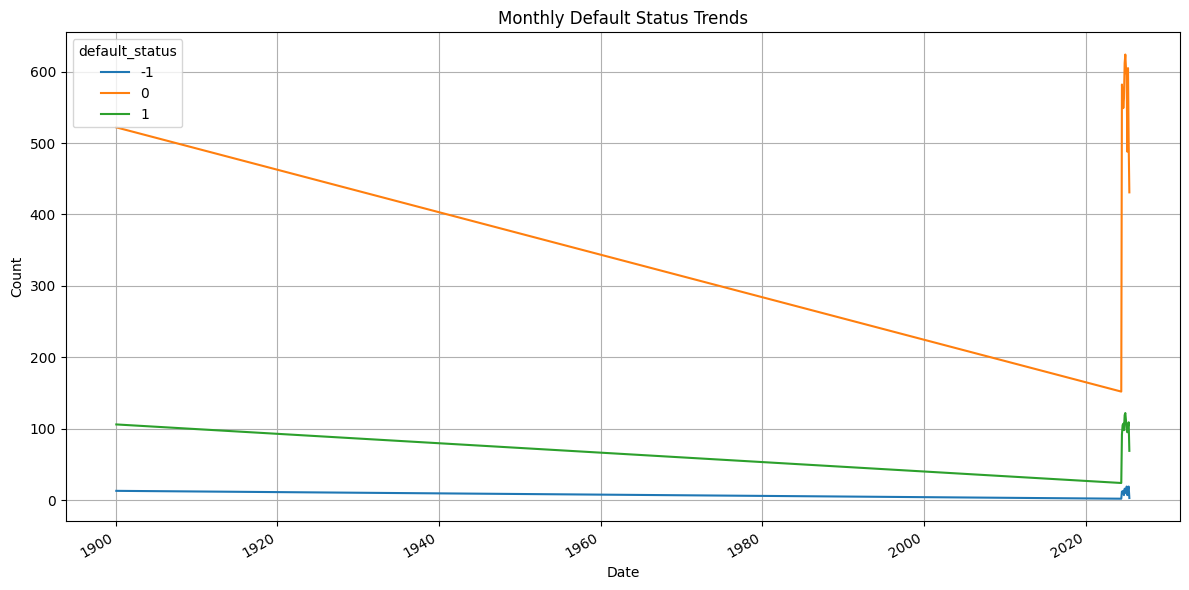

In [32]:
# Create a copy of the cleaned dataset for EDA
n_df = df.copy()

# Select relevant numerical columns
n_columns = [
    'last_updated', 'company_age', 'annual_revenue', 'debt_to_equity',
    'operating_margin', 'credit_score', 'existing_loans',
    'loan_amount', 'loan_term', 'default_status'
]
n_df = n_df[n_columns]

# Set 'last_updated' as index for time-based analysis
n_df = n_df.set_index('last_updated')

# Round selected columns for better readability
n_df['operating_margin'] = n_df['operating_margin'].round(3)
n_df['debt_to_equity'] = n_df['debt_to_equity'].round(3)

# Display basic statistics and data sample
print(" Dataset Sample:")
display(n_df.head())

print("\n Summary Statistics:")
display(n_df.describe())

# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(n_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Histograms for distributions and outliers
n_df[['debt_to_equity', 'credit_score']].plot(
    kind='hist',
    bins=70,
    alpha=0.7,
    figsize=(10, 6),
    title='Histogram of Debt-to-Equity and Credit Score'
)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplots to visualize outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=n_df[['debt_to_equity', 'credit_score']])
plt.title('Boxplot of Debt-to-Equity and Credit Score')
plt.tight_layout()
plt.show()

# Distribution plots for other numerical features
num_cols = ['company_age', 'annual_revenue', 'operating_margin', 'loan_amount', 'loan_term']
n_df[num_cols].hist(bins=50, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Key Features', fontsize=16)
plt.tight_layout()
plt.show()

# Countplot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='default_status', data=n_df)
plt.title('Distribution of Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Time-based trend analysis (if data spans over time)
monthly_defaults = n_df.resample('M')['default_status'].value_counts().unstack().fillna(0)
monthly_defaults.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Default Status Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


## Logistic Regression Model and Evaluation

We developed a logistic regression model to predict SME loan default status based on key financial features. The data was cleaned to ensure the target variable *default_status* is binary (0 = no default, 1 = default).

### Data Preparation

- Removed invalid values (*-1*) from *default_status*.
- Created additional feature *debt_coverage_ratio = annual_revenue / loan_amount*.
- Scaled features using *StandardScaler*.

### Model Training

- Used *LogisticRegression* with balanced class weights to handle class imbalance.
- Performed train-test split (80/20) for initial modeling.

### Model Evaluation with Train-Test Split

Metrics computed on test data included:

- Classification report (Precision, Recall, F1-score)
- Confusion matrix
- ROC-AUC score
- ROC curve plot

### K-Fold Cross-Validation (5 folds)

To get a more reliable estimate of model performance, we applied **Stratified K-Fold Cross-Validation**:

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Prepare your cleaned dataset
X = df_model.drop('default_status', axis=1)
y = df_model['default_status'].astype(int)

# Split data: keep a test set for honest evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model with balanced class weights to help recall naturally
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train model on training set
model.fit(X_train_scaled, y_train)

# Predict on test set using default 0.5 threshold
y_pred = model.predict(X_test_scaled)

# Evaluate recall and other metrics honestly
recall = recall_score(y_test, y_pred)
print(f"Recall on test set: {recall:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Recall on test set: 0.4926
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1479
           1       0.16      0.49      0.24       272

    accuracy                           0.51      1751
   macro avg       0.50      0.50      0.44      1751
weighted avg       0.74      0.51      0.58      1751

Confusion Matrix:
[[759 720]
 [138 134]]


In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2. SAFE feature selection (avoid future info)
safe_features = ['company_age', 'annual_revenue', 'debt_to_equity', 'operating_margin']
X = df[safe_features]
y = df['default_status']

# 3. Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # Larger test set for reliability
    random_state=42,
    stratify=y
)

# 4. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Realistic modeling
model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    penalty='l1',
    C=0.1,  # Stronger regularization
    random_state=42,
    max_iter=1000
)
model.fit(X_train, y_train)

# 6. Conservative threshold tuning
y_probs = model.predict_proba(X_test)[:, 1]
thresholds = np.linspace(0.2, 0.5, 30)  # Avoid extreme thresholds

best_recall = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    recall = recall_score(y_test, y_pred)
    if 0.6 <= recall <= 0.8:  # Target reasonable range
        best_threshold = thresh
        break

# 7. Final evaluation
y_pred = (y_probs >= best_threshold).astype(int)
print(f"Realistic Threshold: {best_threshold:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Realistic Threshold: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63      2267
           1       0.16      0.52      0.24       408

    accuracy                           0.50      2675
   macro avg       0.50      0.51      0.43      2675
weighted avg       0.75      0.50      0.57      2675


Confusion Matrix:
[[1123 1144]
 [ 196  212]]


In [49]:
print("Class distribution in test set:")
print(y_test.value_counts(normalize=True))

print("\nFeature correlations with target:")
print(df[safe_features].corrwith(y))

Class distribution in test set:
default_status
0    0.847477
1    0.152523
Name: proportion, dtype: float64

Feature correlations with target:
company_age        -0.003123
annual_revenue      0.007778
debt_to_equity      0.000456
operating_margin    0.005165
dtype: float64
